# Image Compression using Kmeans

Amir Hossein Binesh, AmirKabir University of Technology

---

## Part 1: Implementing Kmeans

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
def pick_centroids(points, k):
    num = points.shape[0]
    idx = np.random.choice(num, size=k, replace=False)
    return points[idx, :]

In [3]:
def closest_centroid(points, centroids):
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [4]:
def update_centroids(points, clusters, k):
    return np.array([points[clusters==j].mean(axis=0) for j in range(k)])

In [5]:
def kmeans(points, k, iterations):
    centroids = pick_centroids(points, k)
    for i in range(iterations):
        clusters = closest_centroid(points, centroids)
        centroids = update_centroids(points, clusters, k)
    clusters = closest_centroid(points, centroids)
    return centroids, clusters

In [6]:
def msse(points, clusters, centroids, prints = True):
    clustered_points = np.array([nf[(clusters == j).nonzero(),:][0] for j in range(centroids.shape[0])])
    sum_errors = 0
    for i in range(centroids.shape[0]):
        cluster_error = np.sqrt(((clustered_points[i] - centroids[i])**2).sum(axis=1)).mean()
        sum_errors += cluster_error
        if prints: print("CLUSTER ", i, " MEAN ERROR = ", cluster_error)
    return sum_errors/centroids.shape[0]

## Part 2: Run Kmeans on sample data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BCC6A5048>],
      dtype=object)

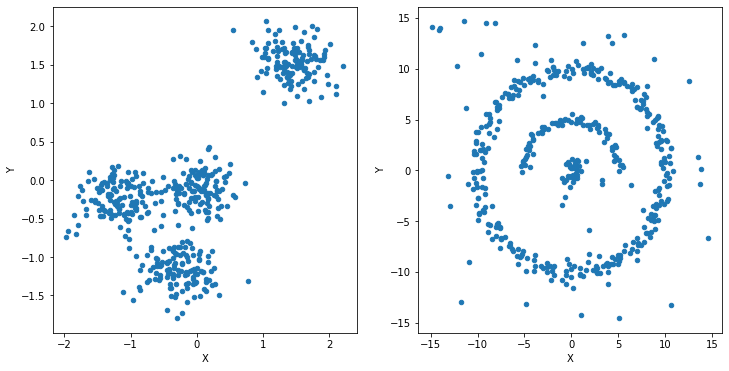

In [7]:
df = pd.read_csv('Dataset1.csv')
df2 = pd.read_csv('Dataset2.csv')

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
df.plot(kind='scatter', ax = axes[0],x='X', y='Y',subplots=True)
df2.plot(kind = 'scatter',x='X', y='Y', ax = axes[1],subplots=True) 

In [8]:
nf = df.to_numpy()
nf2 = df2.to_numpy()

In [9]:
centroids, result = kmeans(nf, 2, 15)

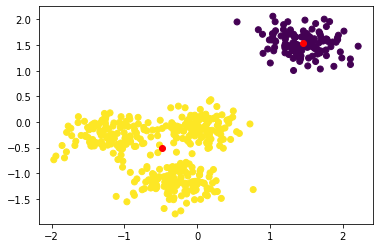

In [10]:
plt.scatter(nf[:,0],nf[:,1],c=result)
plt.scatter(centroids[:,0], centroids[:,1], c='red')

In [11]:
print("CLUSTERING ERROR =" ,msse(nf, result, centroids))

CLUSTER  0  MEAN ERROR =  0.3160088195773474
CLUSTER  1  MEAN ERROR =  0.7491160326963786
CLUSTERING ERROR = 0.532562426136863


In [12]:
centroids, result = kmeans(nf, 3, 15)

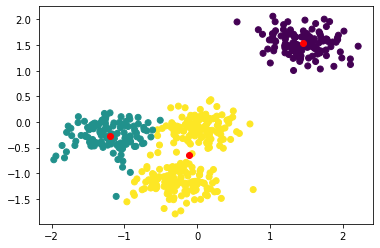

In [13]:
plt.scatter(nf[:,0],nf[:,1],c=result)
plt.scatter(centroids[:,0], centroids[:,1], c='red')

In [14]:
print("CLUSTERING ERROR =" ,msse(nf, result, centroids))

CLUSTER  0  MEAN ERROR =  0.3160088195773474
CLUSTER  1  MEAN ERROR =  0.3374016617245632
CLUSTER  2  MEAN ERROR =  0.6165006068418859
CLUSTERING ERROR = 0.42330369604793217


In [15]:
centroids, result = kmeans(nf, 4, 15)

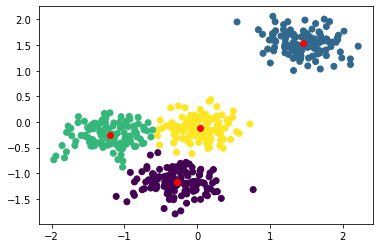

In [16]:
plt.scatter(nf[:,0],nf[:,1],c=result)
plt.scatter(centroids[:,0], centroids[:,1], c='red')

In [17]:
print("CLUSTERING ERROR =" ,msse(nf, result, centroids))

CLUSTER  0  MEAN ERROR =  0.3361233209400449
CLUSTER  1  MEAN ERROR =  0.3160088195773474
CLUSTER  2  MEAN ERROR =  0.3238368940541009
CLUSTER  3  MEAN ERROR =  0.2886597397595568
CLUSTERING ERROR = 0.3161571935827625


**Elbow Method to find the best k**

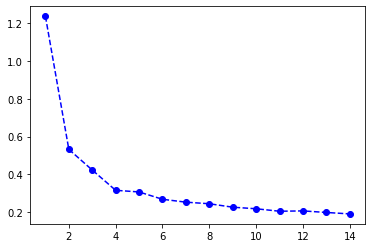

In [18]:
msse_list = []
for k in range(1,15):
    centroids, result = kmeans(nf, k, 15)
    msse_list.append(msse(nf, result, centroids, False))
plt.plot(list(range(1, 15)), msse_list, linestyle='--', marker='o', color='b')

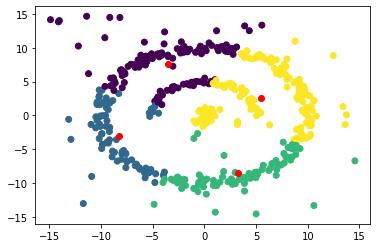

In [19]:
centroids, result = kmeans(nf2, 4, 15)
plt.scatter(nf2[:,0],nf2[:,1],c=result)
plt.scatter(centroids[:,0], centroids[:,1], c='red')

In [20]:
print("CLUSTERING ERROR =" ,msse(nf, result, centroids))

CLUSTER  0  MEAN ERROR =  8.551327169604928
CLUSTER  1  MEAN ERROR =  8.765761667440938
CLUSTER  2  MEAN ERROR =  9.22529455072809
CLUSTER  3  MEAN ERROR =  5.910045426901712
CLUSTERING ERROR = 8.113107203668918


## Part 3: Reduce Image Color

In [21]:
img = mpimg.imread('sample_img1.png')

In [22]:
flat_img = img.reshape(img.shape[0] * img.shape[1],img.shape[2])

In [23]:
colors = [2, 4, 16, 32, 64]

In [24]:
reduced_images = []
for k in colors:
    centroids, result = kmeans(flat_img, k, 15)
    flat_reduced_images = np.array([centroids[result[i]] for i in range(flat_img.shape[0])])
    reduced_images.append(flat_reduced_images.reshape(img.shape[0], img.shape[1], img.shape[2]))

Text(0.5, 1.0, 'original')

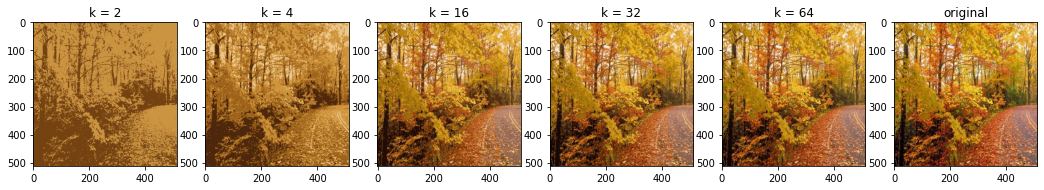

In [25]:
f, axarr = plt.subplots(1,len(colors) + 1,figsize=(18,18))

for i in range(len(colors)):
    axarr[i].imshow(reduced_images[i])
    title = 'k = ' + str(colors[i])
    axarr[i].set_title(title)
axarr[len(colors)].imshow(img)
axarr[len(colors)].set_title('original')

## Part 4: Save Image with less bits

To be done